# Exercise 3.1

Epoch 0: Loss = 0.5186
Epoch 100: Loss = 0.0259
Epoch 200: Loss = 0.0159
Epoch 300: Loss = 0.0120
Epoch 400: Loss = 0.0099
Epoch 500: Loss = 0.0086
Epoch 600: Loss = 0.0076
Epoch 700: Loss = 0.0069
Epoch 800: Loss = 0.0063
Epoch 900: Loss = 0.0058
Final Loss: 0.0055
Learned Parameters (Theta): [-0.27762415  2.10290512  1.73157694]


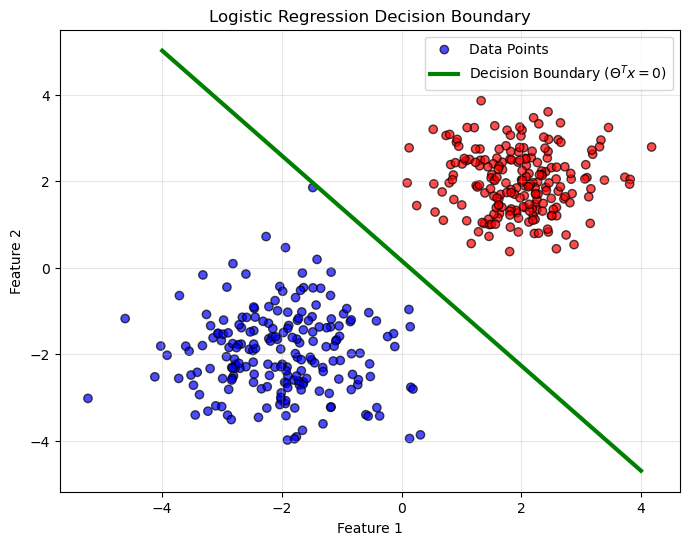

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) 
N_samples = 200    

X0 = np.random.randn(N_samples, 2) + np.array([-2,-2]) 
y0 = np.zeros(N_samples)

X1 = np.random.randn(N_samples, 2) * np.sqrt(0.5) + np.array([2,2])
y1 = np.ones(N_samples)

X_raw = np.vstack((X0, X1))
y = np.hstack((y0,y1))

N = X_raw.shape[0]
X = np.hstack((np.ones((N, 1)), X_raw))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_f(theta, X, y):
    N = len(y)
    z = X @ theta
    predictions = sigmoid(z)
   
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1 - epsilon)
    loss = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return loss

def gradient_f(theta, X, y):

    N = len(y)
    predictions = sigmoid(X @ theta)
    error = predictions - y
    gradient = (1 / N) * (X.T @ error) 
    
    return gradient


learning_rate = 0.1
epochs = 1000

theta = np.zeros(X.shape[1]) 

loss_history = []

for i in range(epochs):
    grad = gradient_f(theta, X, y)
    
    theta = theta - learning_rate * grad
    
    current_loss = loss_f(theta, X, y)
    loss_history.append(current_loss)
    
    if i % 100 == 0:
        print(f"Epoch {i}: Loss = {current_loss:.4f}")

print(f"Final Loss: {loss_history[-1]:.4f}")
print(f"Learned Parameters (Theta): {theta}")

plt.figure(figsize=(8, 6))
plt.scatter(X_raw[:, 0], X_raw[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.7, label='Data Points')


x1_vals = np.linspace(-4, 4, 100)
x2_vals = - (theta[0] + theta[1] * x1_vals) / theta[2]

plt.plot(x1_vals, x2_vals, 'g-', linewidth=3, label=r'Decision Boundary ($\Theta^T x = 0$)')

plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Exercise 3.2

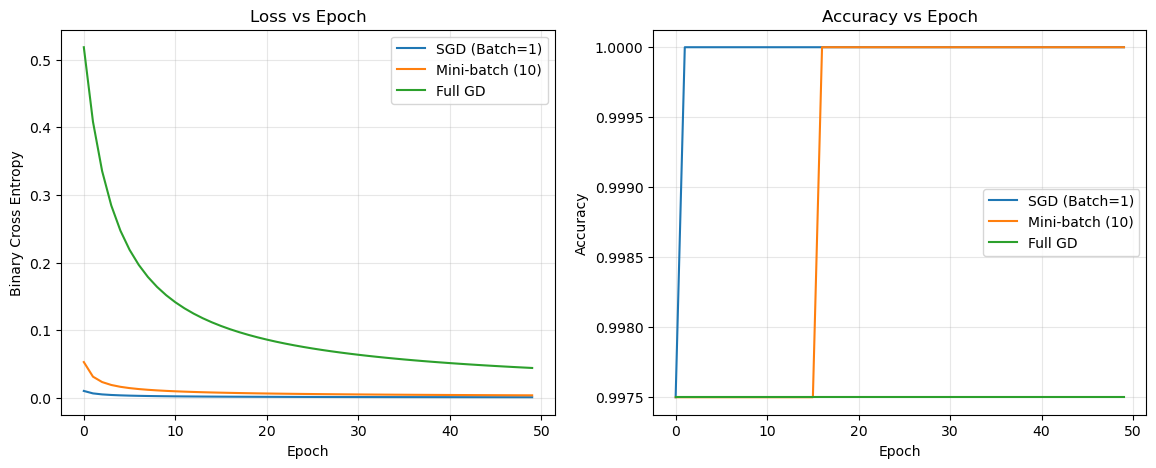

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 200
X0 = np.random.randn(N, 2) + np.array([-2, -2])
X1 = np.random.randn(N, 2) * np.sqrt(0.5) + np.array([2, 2])

X_raw = np.vstack((X0, X1))
y = np.hstack((np.zeros(N), np.ones(N)))

X = np.hstack((np.ones((len(y), 1)), X_raw))

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_f(theta, X, y):
    eps = 1e-15
    pred = np.clip(sigmoid(X @ theta), eps, 1 - eps)
    return -np.mean(y * np.log(pred) + (1 - y) * np.log(1 - pred))

def accuracy(theta, X, y):
    pred = sigmoid(X @ theta) >= 0.5
    return np.mean(pred == y)

def train_sgd(X, y, batch_size, lr=0.1, epochs=50):
    N = len(y)
    theta = np.zeros(X.shape[1])
    loss_hist, acc_hist = [], []

    for _ in range(epochs):
        perm = np.random.permutation(N)
        X_shuff, y_shuff = X[perm], y[perm]

        for i in range(0, N, batch_size):
            X_b = X_shuff[i:i+batch_size]
            y_b = y_shuff[i:i+batch_size]

            err = sigmoid(X_b @ theta) - y_b
            grad = (X_b.T @ err) / len(y_b)
            theta -= lr * grad

        loss_hist.append(loss_f(theta, X, y))
        acc_hist.append(accuracy(theta, X, y))
    
    return loss_hist, acc_hist


epochs = 50
lr = 0.1
modes = [
    ("SGD (Batch=1)", 1, 'r--'), 
    ("Mini-batch (10)", 10, 'g-.'), 
    ("Full GD", len(y), 'k-')
]
results = {}

for name, size, style in modes:
    results[name] = train_sgd(X, y, size, lr, epochs)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

for name, (l_hist, _) in results.items():
    ax1.plot(l_hist, label=name)
ax1.set_title("Loss vs Epoch")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Binary Cross Entropy")
ax1.legend()
ax1.grid(True, alpha=0.3)

for name, (_, a_hist) in results.items():
    ax2.plot(a_hist, label=name)
ax2.set_title("Accuracy vs Epoch")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.show()


# Exercise 3.3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)
N = 200
X0 = np.random.randn(N, 2) + np.array([-2, -2])
X1 = np.random.randn(N, 2) * np.sqrt(0.5) + np.array([2, 2])
X_raw = np.vstack((X0, X1))
y_true = np.hstack((np.zeros(N), np.ones(N)))

theta = np.zeros(X.shape[1])
lr = 0.1
for _ in range(100): 
    pred = 1 / (1 + np.exp(-(X @ theta)))
    err = pred - y_true
    grad = (X.T @ err) / len(y_true)
    theta -= lr * grad

def get_confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

def calculate_metrics(y_true, y_pred_probs, threshold):
    y_pred = (y_pred_probs >= threshold).astype(int)
    
    tp, tn, fp, fn = get_confusion_matrix(y_true, y_pred)
    
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0
    
    return {
        "Threshold": threshold,
        "TP": tp, "TN": tn, "FP": fp, "FN": fn,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1
    }
y_probs = 1 / (1 + np.exp(-(X @ theta)))
thresholds = [0.3, 0.5, 0.7]
results = []

for thresh in thresholds:
    metrics = calculate_metrics(y_true, y_probs, thresh)
    results.append(metrics)


df_results = pd.DataFrame(results)
cols = ["Threshold", "Accuracy", "Precision", "Recall", "F1", "TP", "TN", "FP", "FN"]
print(df_results[cols].to_string(index=False))


 Threshold  Accuracy  Precision  Recall       F1  TP  TN  FP  FN
       0.3    0.9975   0.995025     1.0 0.997506 200 199   1   0
       0.5    0.9975   0.995025     1.0 0.997506 200 199   1   0
       0.7    1.0000   1.000000     1.0 1.000000 200 200   0   0


# Exercise 3.4

Dataset loaded successfully.
Data shape: (768, 9)


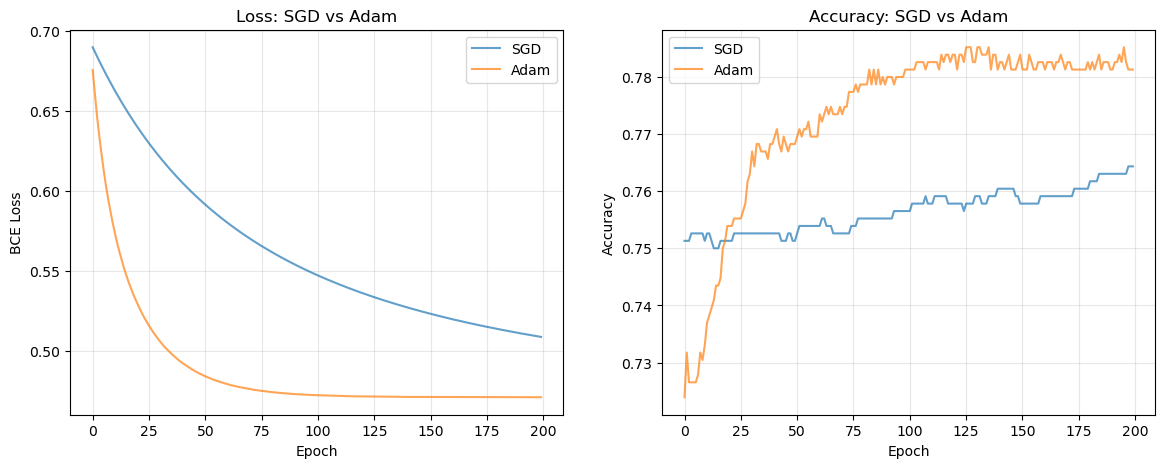

--- SGD Results ---
Accuracy:  0.7643
Precision: 0.6883
Recall:    0.5933
F1 Score:  0.6373
Confusion Matrix: 
[[428 72]
 [109 159]]

--- Adam Results ---
Accuracy:  0.7812
Precision: 0.7358
Recall:    0.5821
F1 Score:  0.6500
Confusion Matrix: 
[[444 56]
 [112 156]]



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('../data/diabetes.csv')
print("Dataset loaded successfully.")

# Extract features and labels
X_raw = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Standardize features
mean = np.mean(X_raw, axis=0)
std = np.std(X_raw, axis=0)
X_scaled = (X_raw - mean) / std

#bias column
N = len(y)
X = np.hstack((np.ones((N, 1)), X_scaled))

print(f"Data shape: {X.shape}")

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss_f(theta, X, y):
    eps = 1e-15
    h = sigmoid(X @ theta)
    h = np.clip(h, eps, 1 - eps)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

def accuracy_f(theta, X, y):
    preds = sigmoid(X @ theta) >= 0.5
    return np.mean(preds == y)

def train_sgd(X, y, lr=1e-3, epochs=200, batch_size=32):
    N, D = X.shape
    theta = np.zeros(D)
    loss_hist, acc_hist = [], []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        X_shuff, y_shuff = X[indices], y[indices]

        for i in range(0, N, batch_size):
            X_b = X_shuff[i:i+batch_size]
            y_b = y_shuff[i:i+batch_size]
            
            h = sigmoid(X_b @ theta)
            gradient = X_b.T @ (h - y_b) / len(y_b)
            
            theta -= lr * gradient

        loss_hist.append(loss_f(theta, X, y))
        acc_hist.append(accuracy_f(theta, X, y))

    return theta, loss_hist, acc_hist


theta_sgd, loss_sgd, acc_sgd = train_sgd(X, y, lr=1e-3, epochs=200, batch_size=32)


def train_adam(X, y, lr=1e-3, epochs=200, batch_size=32, beta1=0.9, beta2=0.999, eps=1e-8):
    N, D = X.shape
    theta = np.zeros(D)
    m = np.zeros(D)
    v = np.zeros(D)
    t = 0
    
    loss_hist, acc_hist = [], []

    for _ in range(epochs):
        indices = np.random.permutation(N)
        X_shuff, y_shuff = X[indices], y[indices]

        for i in range(0, N, batch_size):
            X_b = X_shuff[i:i+batch_size]
            y_b = y_shuff[i:i+batch_size]
            
            h = sigmoid(X_b @ theta)
            g = X_b.T @ (h - y_b) / len(y_b)
            #updates
            t += 1
            m = beta1 * m + (1 - beta1) * g
            v = beta2 * v + (1 - beta2) * (g ** 2)
            
            m_hat = m / (1 - beta1 ** t)
            v_hat = v / (1 - beta2 ** t)
            
            theta -= lr * m_hat / (np.sqrt(v_hat) + eps)

        loss_hist.append(loss_f(theta, X, y))
        acc_hist.append(accuracy_f(theta, X, y))

    return theta, loss_hist, acc_hist

theta_adam, loss_adam, acc_adam = train_adam(X, y, lr=1e-3, epochs=200, batch_size=32)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_sgd, label='SGD', alpha=0.7)
plt.plot(loss_adam, label='Adam', alpha=0.7)
plt.title('Loss: SGD vs Adam')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(acc_sgd, label='SGD', alpha=0.7)
plt.plot(acc_adam, label='Adam', alpha=0.7)
plt.title('Accuracy: SGD vs Adam')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

def evaluate_model(theta, X, y, model_name):
    preds_prob = sigmoid(X @ theta)
    preds = (preds_prob >= 0.5).astype(int)
    
    tp = np.sum((preds == 1) & (y == 1))
    tn = np.sum((preds == 0) & (y == 0))
    fp = np.sum((preds == 1) & (y == 0))
    fn = np.sum((preds == 0) & (y == 1))
    
    acc = (tp + tn) / len(y)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    
    print(f"--- {model_name} Results ---")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1 Score:  {f1:.4f}")
    print(f"Confusion Matrix: \n[[{tn} {fp}]\n [{fn} {tp}]]\n")

evaluate_model(theta_sgd, X, y, "SGD")
evaluate_model(theta_adam, X, y, "Adam")